In [1]:
import openpyxl as xl
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pandas as pd
import time
from IPython.display import clear_output

In [2]:
def initiate():
    global count,dates,amounts,sheet,df
    
    while(True):
        directory = input("Enter path to the excel file : ")
        try:
            wb = xl.load_workbook(directory + "\\transactions.xlsx")
            break
        except FileNotFoundError:
            print("File not found. Check the path again !")
            time.sleep(2)
            clear_output()
    sheet = wb['Main']
    df = pd.read_excel("transactions.xlsx")
    
    count = 0
    dates = [[]]
    amounts = [[]]

In [3]:
def get_date_month(row_number):
    date = str(sheet.cell(row_number, 1).value)
    date,month = convert_date(date)
    
    return date,month

In [4]:
def convert_date(date):
    date = datetime.datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S')
    month = date.strftime('%B')
    date = date.strftime('%B %d,%Y')
    
    return date,month

In [5]:
def reverse_convert_date(date):
    date = date.strftime('%Y-%m-%d')
    
    return date

In [6]:
def get_type(row_number):
    return sheet.cell(row_number, 2).value

In [7]:
def get_amount(date):
    rev_date = reverse_convert_date(datetime.datetime.strptime(date, '%B %d,%Y'))
    expense = -1 * df[(df['Date'] == rev_date) & (df['Type'] == 'E')]['Amount'].sum()
    income = df[(df['Date'] == rev_date) & (df['Type'] == 'I')]['Amount'].sum()
#     return sheet.cell(row_number, 3).value
    return income,expense

In [8]:
def get_threshold_array(amount):
    greater_than_threshold = [i for i, val in enumerate(amount) if val>0]
    greater_than_threshold = np.array(greater_than_threshold)
    return greater_than_threshold

Enter path to the excel file : .


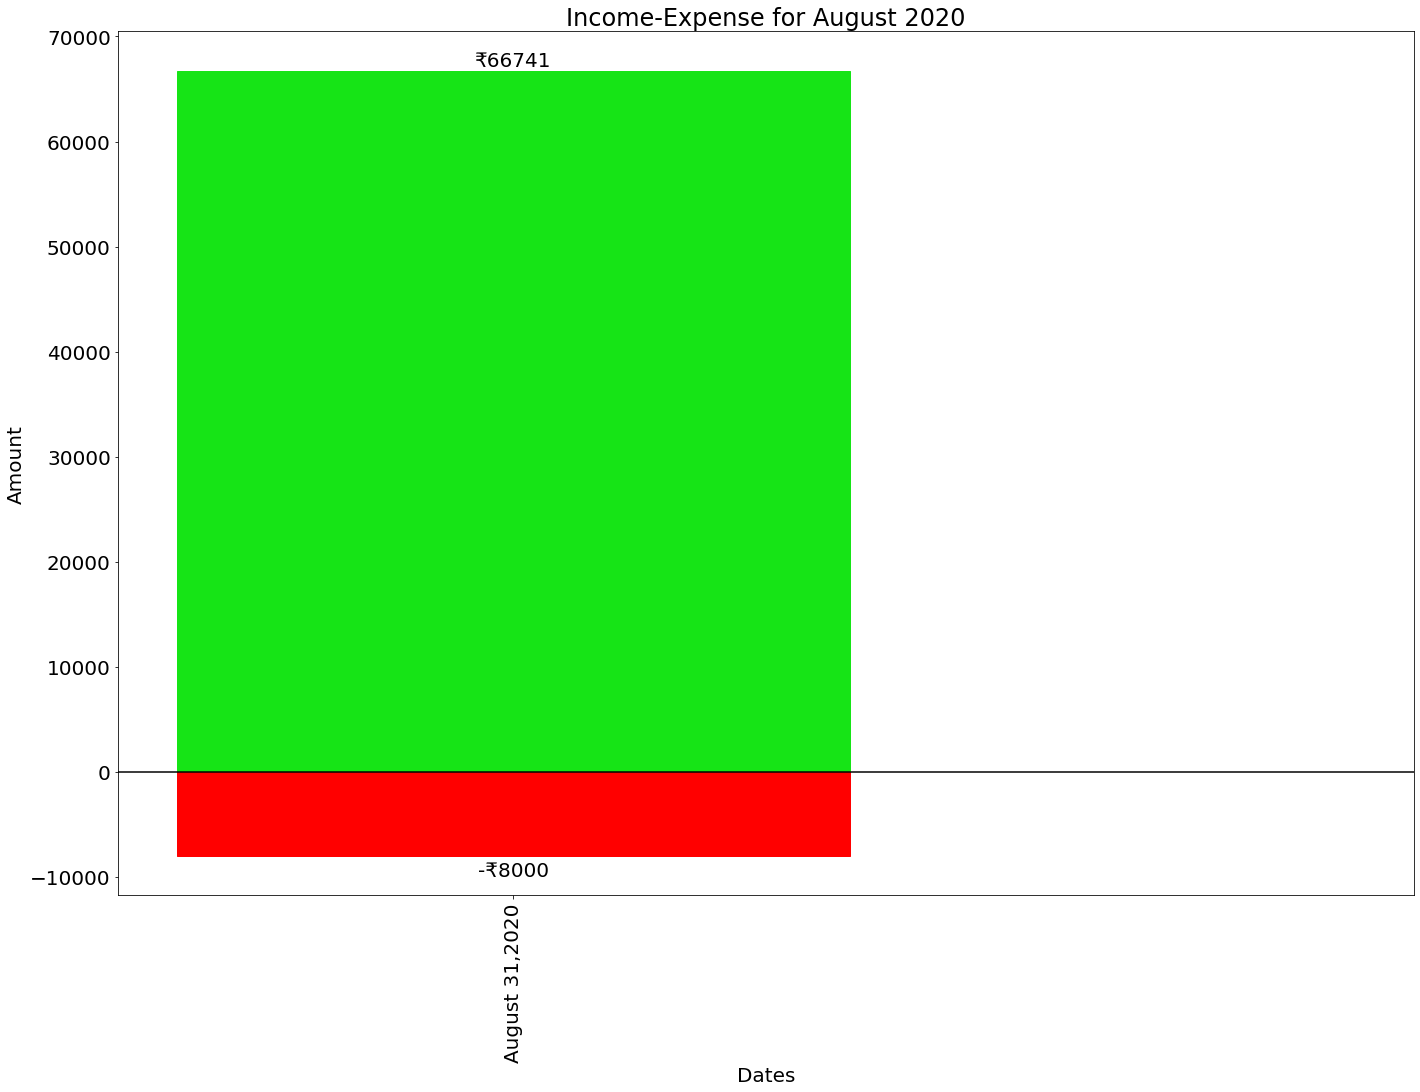

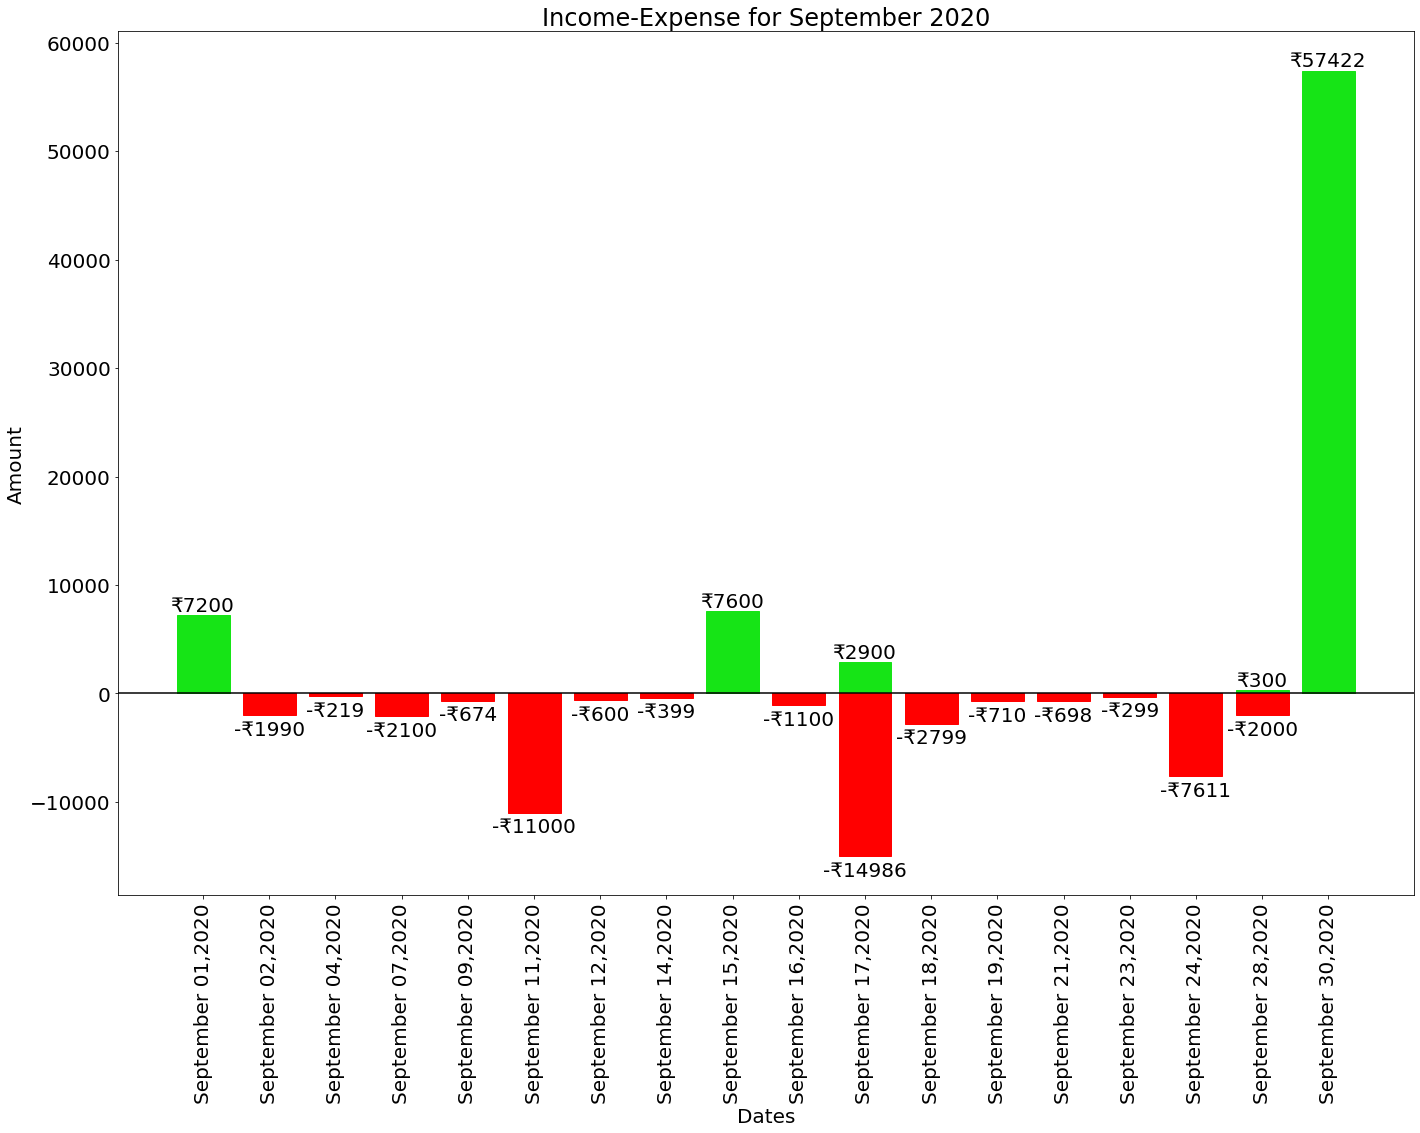

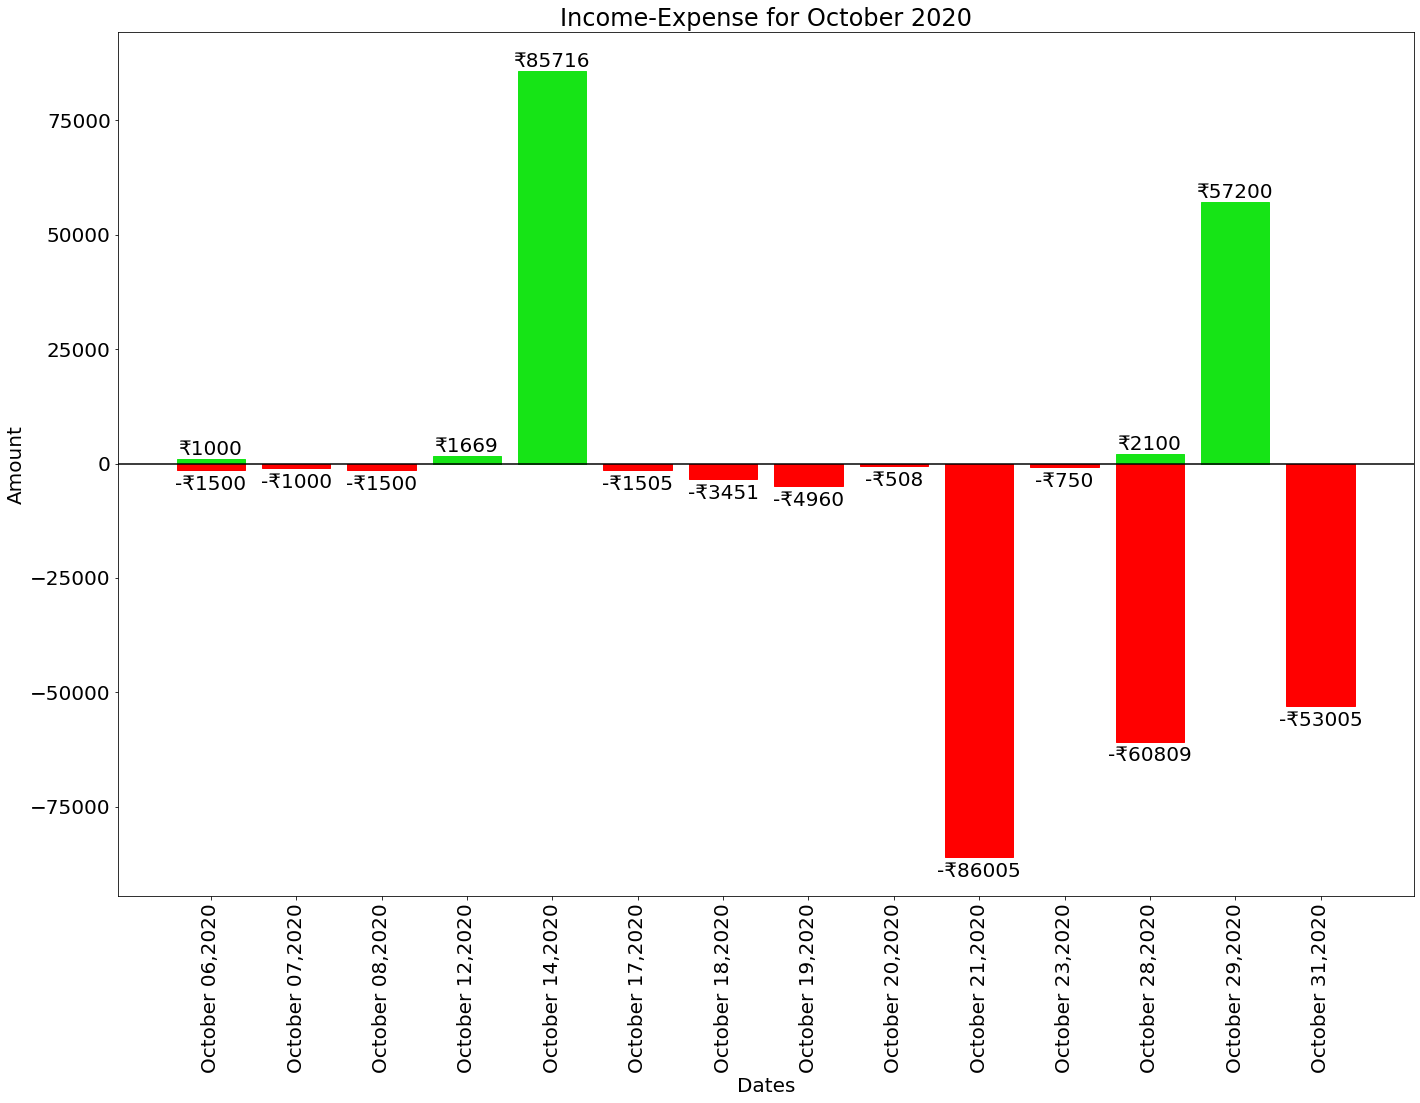

In [10]:
initiate()

prev_date = ''
_, prev_month = get_date_month(2)

for row_number in range(2, sheet.max_row + 1):
    date, month = get_date_month(row_number)

    if prev_month != month:
        count += 1
        dates.append([])
        amounts.append([])          

    if prev_date != date:
        income,expense = get_amount(date)
        dates[count].append(date)
        amounts[count].append(income)
        dates[count].append(date)
        amounts[count].append(expense)

    prev_date = date
    prev_month = month

for date, amount in zip(dates,amounts):
    greater_than_threshold = get_threshold_array(amount)

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 3, 3])
    plt.axhline(y=0, color='black', linestyle='-')
    bar_container = ax.bar(date, amount)
    low_lim, high_lim = ax.get_ylim()

    month = date[0].split(' ')[0]
    year = date[0].split(',')[1]

    for bar in bar_container:
        if bar.get_height()<0:
            bar.set_color('r')
            total = high_lim - low_lim
            negative_offset = -1 * 0.0275 * total
            if bar.get_height() != 0:
                plt.text(bar.get_x() + bar.get_width()/2.0,
                         bar.get_height() + negative_offset ,
                         '-₹%d' % (-1 * int(bar.get_height())),
                         ha='center', va='bottom')
        else:
            bar.set_color('#16e416')
            if bar.get_height() != 0:
                plt.text(bar.get_x() + bar.get_width()/2.0,
                         bar.get_height(),
                         '₹%d' % int(bar.get_height()),
                         ha='center', va='bottom')
        
    ax.set_title("Income-Expense for " + month + " " + year)
    ax.set_xlabel('Dates')
    ax.set_ylabel('Amount')
    plt.xticks(rotation=90)
    plt.show()
    plt.rcParams.update({'font.size': 20})